# Assignment #3 - Neural Networks
### <font color="red">DUE: Oct 29 (Tuesday) 11:00 pm</font>
#### <font color="blue"> Nikhil Kumar Mutyala </font>

# I. Overview
The objective of this assignment is to implement a nonlinear regression and nonlinear logistic regression classifier by utilizing neural networks. The purpose of this is assignment is to explain and use 5-fold cross validation to find a good neural network parameters and report the CV accuracies.

First, the data is cleaned. Then, the data is visualized using heatmap, correlation, pairplot, countplot and grid.

Then the nonlinear regression is implemented using NeuralNet class. It consists of various defined functions like add_ones, pack, unpack, gradientf, optimtaregtf etc.

The nonlinear logistic regression is implemented using NeuralNetLog class. It consists of various defined functions like add_ones, pack, unpack, gradientf, optimtaregtf etc. Then this is implemented on toy dataset to see if the model is working or not.

A class for 5 fold cross validation is implemented using CrossValid class. Now, the result is checked by plotting the results.






# II. Data

## Description

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey. The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

## Plots to Visualize Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("pulsar_stars.csv")

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df.shape

(17898, 9)

In [6]:
df = df.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

In [7]:
df.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [8]:
df.isnull().sum()

mean_profile            0
std_profile             0
kurtosis_profile        0
skewness_profile        0
mean_dmsnr_curve        0
std_dmsnr_curve         0
kurtosis_dmsnr_curve    0
skewness_dmsnr_curve    0
target_class            0
dtype: int64

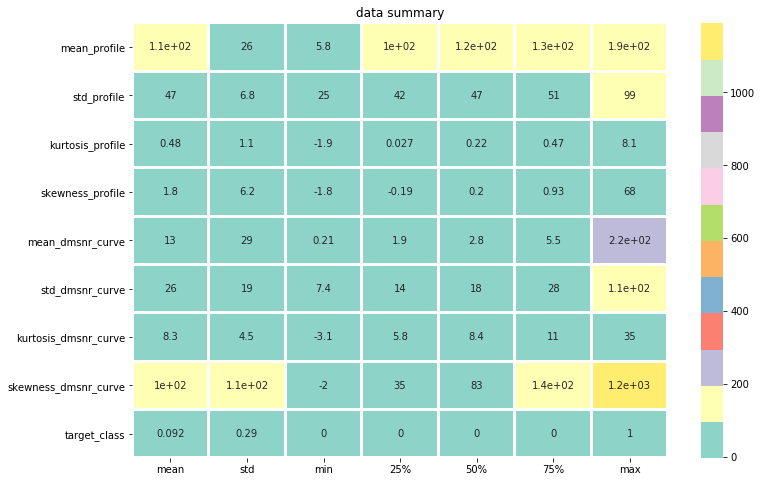

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette("Set3"))
plt.title("data summary")
plt.show()

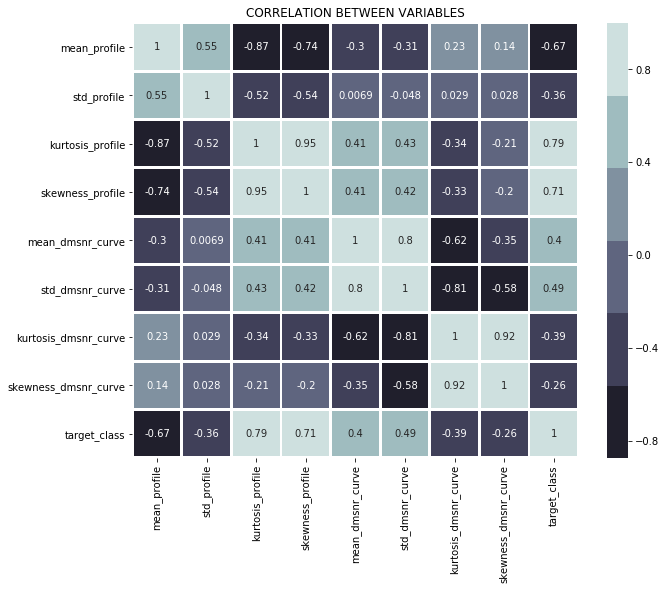

In [10]:
correlation=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,linewidth=2,annot=True,cmap=sns.color_palette("bone"),edgecolor='k'*2)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

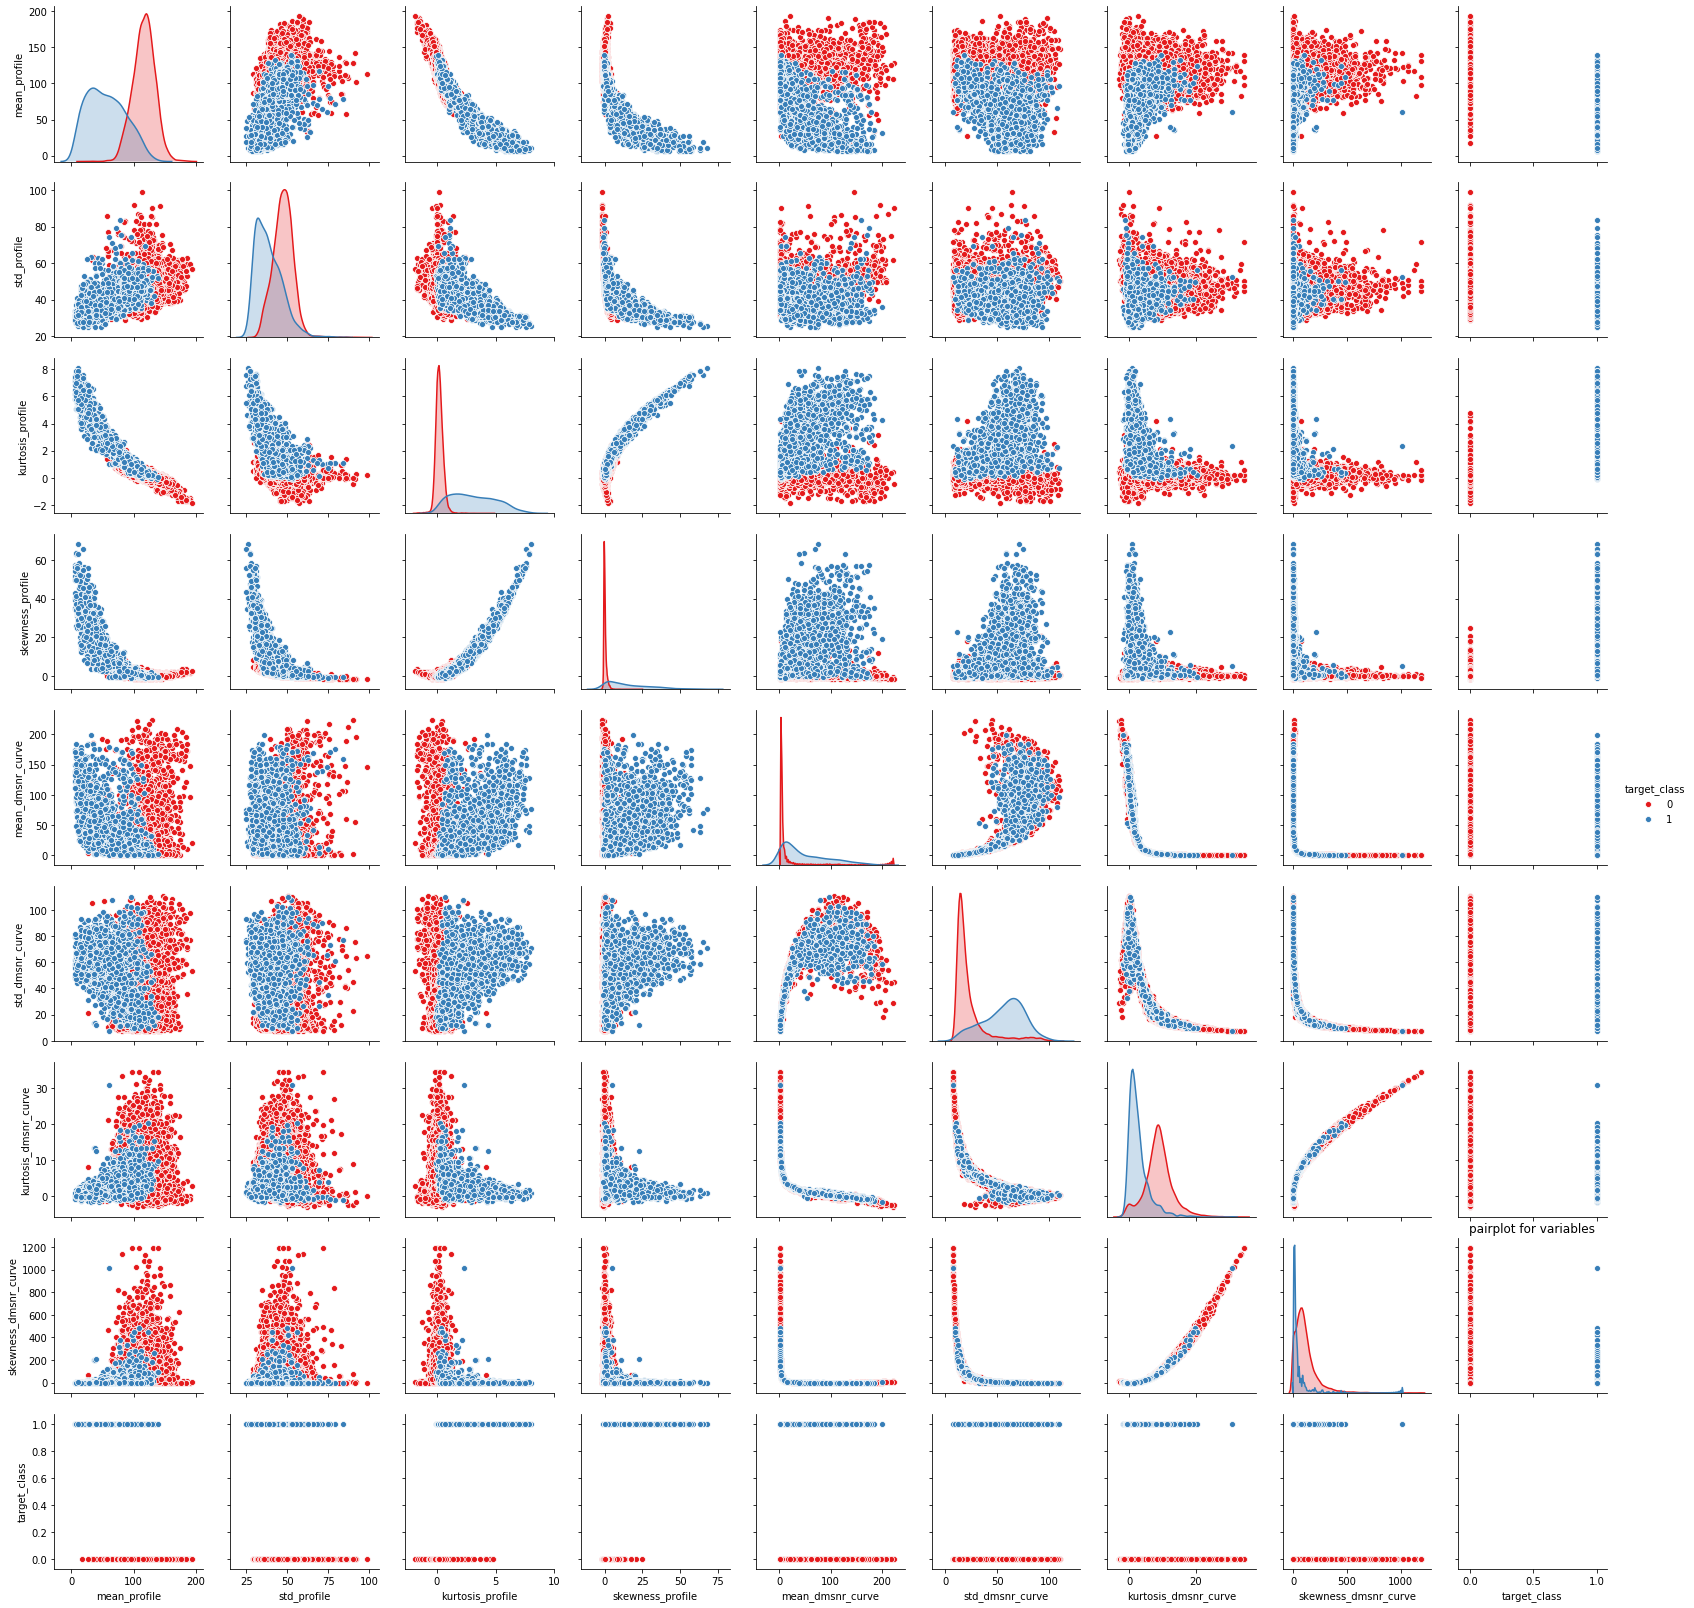

In [11]:
sns.pairplot(df,hue='target_class',palette='Set1')
plt.title('pairplot for variables')
plt.show()

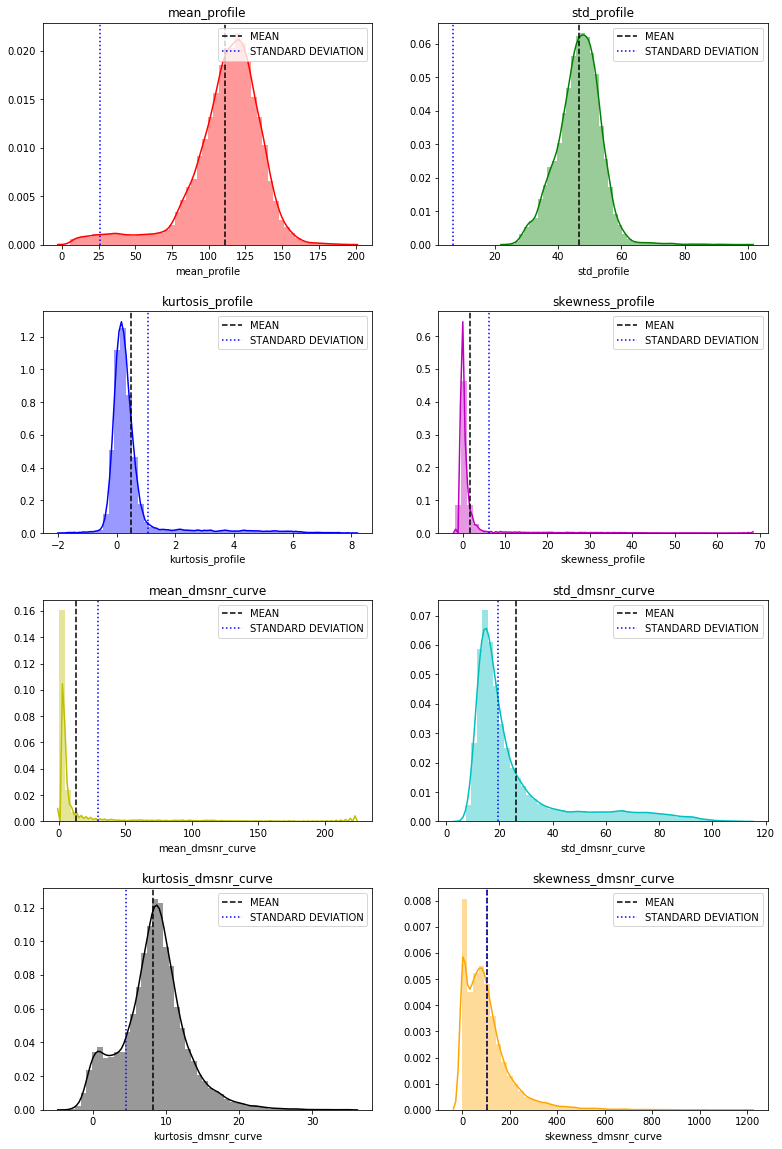

In [12]:
import itertools 
columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

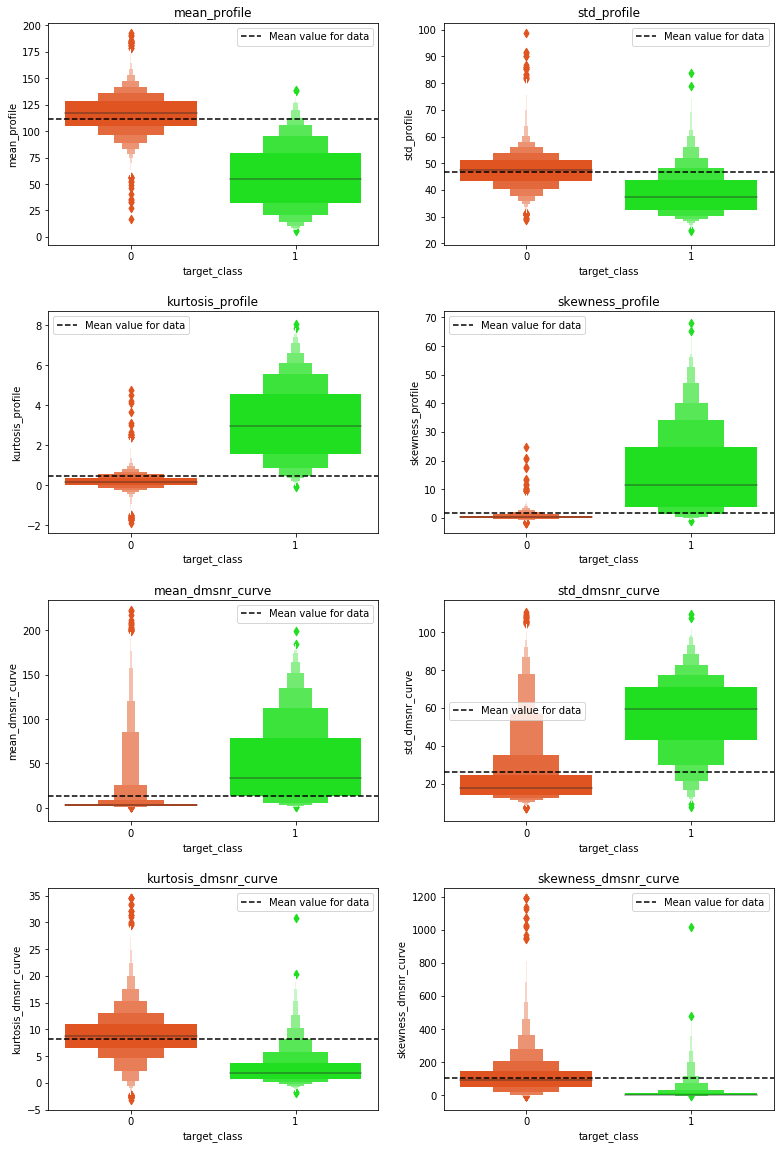

In [13]:
columns = [x for x in df.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=df["target_class"],y=df[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(df[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

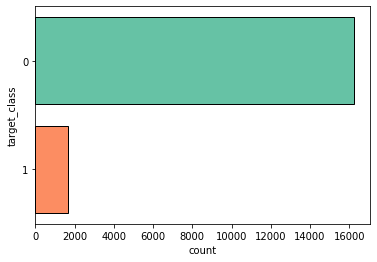

In [14]:
sns.countplot(y=df['target_class'],linewidth=1,edgecolor="k"*2,palette='Set2',saturation=1)
plt.show()

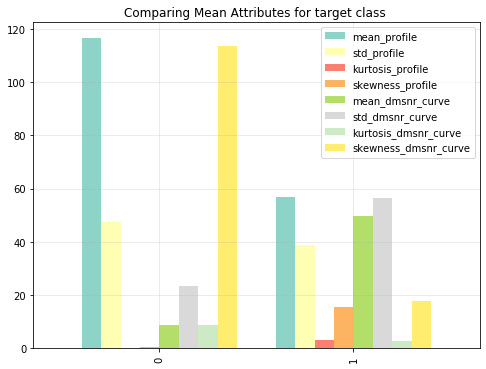

In [15]:
compare=df.groupby('target_class')[['mean_profile','std_profile','kurtosis_profile','skewness_profile',
                                    'mean_dmsnr_curve','std_dmsnr_curve','kurtosis_dmsnr_curve','skewness_dmsnr_curve']].mean().reset_index()
compare=compare.drop('target_class',axis=1)
compare.plot(kind='bar',figsize=(8,6),width=.8,colormap='Set3')
plt.grid(True,alpha=.3)
plt.title('Comparing Mean Attributes for target class ')
plt.show()

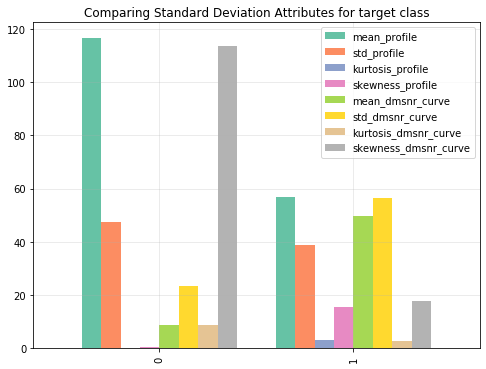

In [16]:
compare1=df.groupby('target_class')[['mean_profile','std_profile','kurtosis_profile','skewness_profile',
                                    'mean_dmsnr_curve','std_dmsnr_curve','kurtosis_dmsnr_curve','skewness_dmsnr_curve']].mean().reset_index()
compare1=compare1.drop('target_class',axis=1)
compare1.plot(kind='bar',width=0.8,figsize=(8,6),colormap=('Set2'))
plt.grid(True,alpha=.3)
plt.title('Comparing Standard Deviation Attributes for target class')
plt.show()

## Reading and Analyzing the Plots

1. We can see that our data is quite separable on most of the columns.
2. Most of our Columns are already related or derived from one or another. And we can see it clearly. 
3. We can see that our data has different kind of distributions which is helpful for training our models.
4. Target class mostly has '0' class than '1' class.
5. Comparision of mean and standard deviation between attributes for target classes is observed to see which attribute has higher mean and standard deviation.
6. The distribution of variables in the dataset is observed.



# Summary of Neural Networks, NonLinear Regression, Cross Validation and activation function

## Neural Networks

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.

Neural networks help us cluster and classify. We can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on. The purpose of a neural network is to learn to recognize patterns in our data. Once the neural network has been trained on samples of our data, it can make predictions by detecting similar patterns in future data.


## Nonlinear Regression
 Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.
 
The main objective of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set.

In [17]:
from grad import scg, steepest
import copy
from util import Standardizer


class NeuralNet:
    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy.copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                #print(delta)
                #print("p2")
                #print(Z)
                #print("p3")
                #print(self._W[i][1:, :].T)
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T,**params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y


### Summmary of Nonlinear Regression
The nonlinear regression is implemented using NeuralNet class. This has various defined functions like init, add_ones, get_nlayers, set_hunit, pack, unpack, cp_weight, RBF, Sigma, forward, backward, errorf, objectf, train, gradientf, optimtarget and use.

1. The init function initializes the nonlinear regression model. It assigns the weights for the layers. 
2. The get_nlayers gives how many layers that are to be implemented.
3. Set_hunit function is used to either update or initiate the weights. It takes the weight as the parameter.
4. The Pack function packs the multiple weights of each layer into one vector. 
5. The unpack function unpacks the multilple weights.
6. The forward pass function propogates the neural function forward
7. Activation function is used to make the network nonlinear.
8. The backward pass function propogates the neural function backwards. It returns the weights vector packed together as output.
9. The error function gives errors if there are any in the data.
10. The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass.
11. The optimtarget function tries to reduce the error by using the object function and updates the weights accordingly.
12. The use function is applied to the test data after training the model. Testing data is passed as parameter and it stadardizes the data.

Then forward is applied on the data which returns the predictions. The nlayers is no of hidden layers, rho is learning rate of the attributes. W is weights, stdX is the standardization class for the data, stdT is the standardization class for the target.


 
 

# Nonlinear Logistic Regression
Nonlinear regression is a regression in which the dependent or criterion variables are modeled as a non-linear function of model parameters and one or more independent variables. The core idea behind any Non Linear method is to attain better accuracies, which can be possible only with higher than linear order polynomial which is what we are leveraging to perform our task. A neural network with a multi layer perceptron, will do this task for us, and we can play with the number of neurons in each layer to find the accurate solution for our problem.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from grad import scg, steepest
import copy
from util import Standardizer


class NeuralNetLog:
    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy.copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                #t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = np.dot(self.add_ones(t), self._W[i])
                #expmat = np.exp(np.dot(self.add_ones(t), self._W[i]))
                #print(expmat.shape)
                #denom = np.sum(expmat,axis=0)
                #t = expmat/denom
                t = 1/(1+np.exp(-np.dot(self.add_ones(t), self._W[i])))
                
                #print(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                #print(delta)
                #print("p2")
                #print(Z)
                #print("p3")
                #print(self._W[i][1:, :].T)
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum( np.sum((T * np.log(Y)) , axis=1), axis=0)) + wpenalty

    def train(self, X, T,**params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.05)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget and False:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

### Summmary of Nonlinear Logistic Regression
The nonlinear logistic regression is implemented using NeuralNetLog class. This has various defined functions like init, add_ones, get_nlayers, set_hunit, pack, unpack, cp_weight, RBF, Sigma, forward, backward, errorf, objectf, train, gradientf, optimtarget and use.

1. The init function initializes the nonlinear logistic regression model. It assigns the weights for the layers. 
2. The get_nlayers gives how many layers that are to be implemented.
3. Set_hunit function is used to either update or initiate the weights. It takes the weight as the parameter.
4. The Pack function packs the multiple weights of each layer into one vector. 
5. The unpack function unpacks the multilple weights.
6. The forward pass function propogates the neural function forward
7. Activation function is used to make the network nonlinear.
8. The backward pass function propogates the neural function backwards. It returns the weights vector packed together as output.
9. The error function gives errors if there are any in the data.
10. The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass.
11. The optimtarget function tries to reduce the error by using the object function and updates the weights accordingly.
12. The use function is applied to the test data after training the model. Testing data is passed as parameter and it stadardizes the data.

Then forward is applied on the data which returns the predictions. The nlayers is no of hidden layers, rho is learning rate of the attributes. W is weights, stdX is the standardization class for the data, stdT is the standardization class for the target.


 
 

[[ 0.89080817  0.46620568]
 [ 0.47485502 -0.02594984]
 [-0.32780312 -1.00611675]
 ...
 [-0.37893376  0.33392705]
 [ 0.38146485  0.18993724]
 [-1.03476245  0.25453392]]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 0]]
[[0.49806866 0.51247457]
 [0.49861138 0.51165856]
 [0.49970906 0.50988688]
 ...
 [0.49675038 0.51278296]
 [0.49802544 0.51215174]
 [0.49608714 0.51286827]]


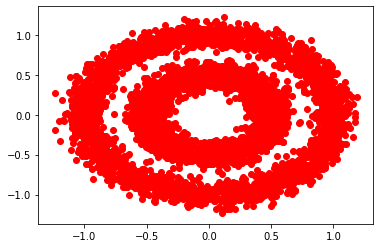

In [19]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.preprocessing import OneHotEncoder

X, T = make_circles(n_samples=5000, noise=0.08, factor=0.5)
new_T = np.array([[0,0]]*X.shape[0]) #one hot T
for i in range(len(T)):
    new_T[i][T[i]] = 1
    
print(X)
print(new_T)

plt.scatter(X[:,0],X[:,1],color='Red')

trainnet = NeuralNetLog([X.shape[1],11,2])
trainnet.train(X,new_T,ftracep=True)
tranans,z = trainnet.use(X,retZ=True)

#cc = CrossValid(X,new_T)
#cc.five_fold_classify()

#new_T = np.
print(tranans)

## Examination of correct implementation (NonlinearLogReg) with toy data

In [20]:
print(tranans[1500])
print(len(np.unique(tranans,axis=1)))
print(np.unique(tranans.argmax(axis=1)))
print(tranans.shape)
print(tranans.argmax(axis=1).shape)

[0.49882639 0.51149151]
5000
[1]
(5000, 2)
(5000,)


In [21]:
import numpy
X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

nn = NeuralNetLog([2,3,2])
nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
Y = nn.use(X)
print(T, Y)

[[0 1]
 [1 0]
 [1 0]
 [0 1]] [[0.49769923 0.51347194]
 [0.50226918 0.5143333 ]
 [0.49339829 0.51237571]
 [0.49787292 0.51316492]]


Text(0.5, 1.0, 'test data set')

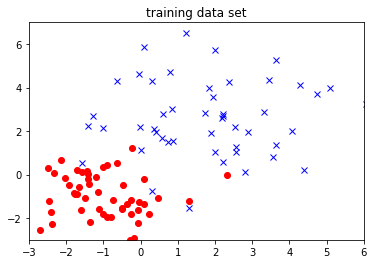

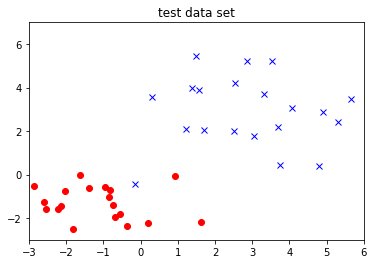

In [22]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [23]:
y_dataframe=df['target_class']
dataframe_lr=df.drop(['target_class'],axis=1)
from sklearn import model_selection
from sklearn.metrics import r2_score

In [24]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(dataframe_lr, y_dataframe,test_size=0.20,random_state=42)

In [27]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

# Cross Validation and Correctness of Implementation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods. 
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
 1. Take the group as a hold out or test data set
 2. Take the remaining groups as a training data set
 3. Fit a model on the training set and evaluate it on the test set
 4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

In [28]:
import random

class CrossValid:
    def __init__(self,X,Y,typ="reg"):
        self.X = X
        self.T = Y
        self.typ = typ
    
    def error_func_regress(self,myanswer,Y):
        return (np.sum(((Y-myanswer)**2)/Y.shape[0]))**0.5
    
    def error_func_classify(self,T,Y):
        return float(100 - ((np.count_nonzero(np.abs(T.argmax(axis=1) - Y.argmax(axis=1)))))*100/T.shape[0])
            
        
    def five_fold_regress(self):
        print(self.X.shape)
        part = int(self.X.shape[0]/5)
        train = self.X[:5*part+1,:]
        trainanswers = self.T[:5*part+1,:]
        validate = self.X[3*part+1:4*part+1,:]
        validateanswers = self.T[3*part+1:4*part+1:,:]
        test = self.X[4*part+1:5*part:,:]
        testanswers = self.T[4*part+1:5*part:,:]
        trainnet = NeuralNet([self.X.shape[1],3,1])
        models = [[self.X.shape[1],2,1],[self.X.shape[1],3,1],[self.X.shape[1],11,1],[self.X.shape[1],7,1],[self.X.shape[1],12,1],[self.X.shape[1],3,1]]
        
        
        if part > 10000:
            fold = part
        else:
            fold = X.shape[0]
            part = fold
        
        for i in range(0,train.shape[0],fold):
            trainnet = NeuralNet(models[int(i/fold)])
            rn = random.randint(0,4)
            validate = self.X[(rn*part)+1:((rn+1)*part)+1,:]
            validateanswers = self.T[(rn*part)+1:((rn+1)*part)+1,:]
            if train.shape[0] < i + fold-1:
                trainnet.train(train[i:i+train.shape[0]-1,:],trainanswers[i:i+train.shape[0]-1,:],ftracep=True)
                
            else:
                trainnet.train(train[i:i+fold-1,:],trainanswers[i:i+fold-1,:],ftracep=True)
            
            myans,z = trainnet.use(validate,retZ=True)
            print("\n -------------------------- \n")
            print("RMSE IN PART " + str(int(i/fold) + 1) + " IS: ")
            print(self.error_func_regress(myans,validateanswers))
            print("\n --------------------------\n")
        myans,z = trainnet.use(test,retZ=True)
        print("RMSE IN TEST IS: ")
        print(self.error_func_regress(myans,testanswers))
        tryans,z = trainnet.use(self.X,retZ=True)
        print(self.T.shape)
        print(self.X.shape)
        if self.X.shape[1] == 1:
            plt.figure(figsize=(15,8))
            plt.title("ACTUAL MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
            plt.scatter(self.X,self.T)
            xs, ys = zip(*sorted(zip(self.X, tryans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(self.X,tryans,color="orange")
            plt.title("PREDICTED MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
            plt.figure(figsize=(15,8))
            plt.scatter(test,testanswers)  
            xs, ys = zip(*sorted(zip(test, myans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(test,myans,color="orange")
            
        else:
            #print(self.X[:,0].shape)
            plt.figure(figsize=(15,8))
            plt.title("ACTUAL MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
            plt.scatter(self.X[:,0],self.T)  
            xs, ys = zip(*sorted(zip(self.X[:,0], tryans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(self.X[:,0],tryans,color="orange")
            plt.figure(figsize=(15,8))
            plt.title("ACTUAL MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
            plt.scatter(test[:,0],testanswers)  
            xs, ys = zip(*sorted(zip(test[:,0], myans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(test[:,0],myans,color="orange")
            #print(self.X[:,2].shape)
            plt.figure(figsize=(15,8))
            plt.title("PREDICTED MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
            plt.scatter(self.X[:,2],self.T)
            xs, ys = zip(*sorted(zip(self.X[:,0], tryans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(self.X[:,2],tryans,color="orange")
            plt.figure(figsize=(15,8))
            plt.title("PREDICTED MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
            
            plt.scatter(test[:,2],testanswers)  
            xs, ys = zip(*sorted(zip(test[:,2], myans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(test[:,2],myans,color="orange")
            #print(self.X[:,2].shape)
            plt.figure(figsize=(15,8))
            plt.scatter(self.X[:,5],self.T)  
            xs, ys = zip(*sorted(zip(self.X[:,0], tryans)))

            plt.plot(xs, ys,color="orange")
            #plt.plot(self.X[:,5],tryans,color="orange")
            plt.figure(figsize=(15,8))
            plt.scatter(test[:,5],testanswers)  
            xs, ys = zip(*sorted(zip(test[:,5], myans)))

            plt.plot(xs, ys,color="orange")
            plt.plot(test[:,5],myans,color="orange")
            
    def five_fold_classify(self):
        print(self.X.shape)
        part = int(self.X.shape[0]/5)
        train = self.X[:5*part+1,:]
        trainanswers = self.T[:5*part+1,:]
        validate = self.X[3*part+1:4*part+1,:]
        validateanswers = self.T[3*part+1:4*part+1:,:]
        test = self.X[4*part+1:5*part:,:]
        testanswers = self.T[4*part+1:5*part:,:]
        #trainnet = NeuralNetLog([self.X.shape[1],5,2])
        #trainnet.train(self.X,self.T)
        #return
        #trainnet.train(train[0:9999,:],trainanswers[0:9999,:])
        
        models = [[self.X.shape[1],7,2],[self.X.shape[1],11,2],[self.X.shape[1],3,2],[self.X.shape[1],10,2],[self.X.shape[1],5,2]]
        fold = part
        for i in range(0,train.shape[0],fold):
            trainnet = NeuralNet(models[int(i/fold)])
            rn = random.randint(0,4)
            validate = self.X[(rn*part)+1:((rn+1)*part)+1,:]
            validateanswers = self.T[(rn*part)+1:((rn+1)*part)+1,:]
            if train.shape[0] < i + fold -1:
                trainnet.train(train[i:i+train.shape[0]-1,:],trainanswers[i:i+train.shape[0]-1,:],ftracep=True)
                
            else:
                trainnet.train(train[i:i+fold-1,:],trainanswers[i:i+fold-1,:],ftracep=True)
            
            myans,z = trainnet.use(validate,retZ=True)
            print("\n -------------------------- \n")
            print("ACCURACY IN PART " + str(int(i/fold) + 1) + " IS: ")
            print(self.error_func_classify(myans,validateanswers))
            print("\n --------------------------\n")
        myans,z = trainnet.use(test,retZ=True)
        print("ACCURACY IN TEST IS: ")
        print(self.error_func_classify(myans,testanswers))
        tryans,z = trainnet.use(self.X,retZ=True)
        print(self.T.shape)
        print(self.X.shape)
        #print(self.X[:,0].shape)
        #Xans = np.append(test,myans,1)
        Xans = np.append(test,myans.argmax(axis=1).reshape(len(myans),1),1)
        Xtrain = np.append(test,testanswers,1)

        print(X)
        print(X.shape)
        n = np.unique(Xtrain[:,X.shape[1]])
        groupednp = np.array( [ list(Xtrain[Xtrain[:,X.shape[1]]==i,1]) for i in n])
        groupednp2 = np.array( [ list(Xtrain[Xtrain[:,X.shape[1]]==i,2]) for i in n])

        n = np.unique(Xans[:,X.shape[1]])
        groupednpans = np.array( [ list(Xans[Xans[:,X.shape[1]]==i,1]) for i in n])
        groupednpans2 = np.array( [ list(Xans[Xans[:,X.shape[1]]==i,2]) for i in n])
        
        fig = plt.figure(figsize=(15,8))
        ax1 = fig.add_subplot(111)
        plt.title("ACTUAL MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
        #color = colors[T.argmax(0)]
        for i in range(len(groupednp)):
            groupednp[i] = (np.array(groupednp[i]) - np.array(groupednp[i]).min())/(np.array(groupednp[i]).max() - np.array(groupednp[i]).min())
            groupednp2[i] = (np.array(groupednp2[i]) - np.array(groupednp2[i]).min())/(np.array(groupednp2[i]).max() - np.array(groupednp2[i]).min())
            ax1.scatter(groupednp[i],groupednp2[i])
    
        fig = plt.figure(figsize=(15,8))
        ax1 = fig.add_subplot(111)
        plt.title("PREDICTED MULTI DIMENSION ACTUALIZED IN TWO DIMENSIONS")
        #color = colors[T.argmax(0)]
        for i in range(len(groupednpans)):
            groupednpans[i] = (np.array(groupednpans[i]) - np.array(groupednpans[i]).min())/(np.array(groupednpans[i]).max() - np.array(groupednpans[i]).min())
            groupednpans2[i] = (np.array(groupednpans2[i]) - np.array(groupednpans2[i]).min())/(np.array(groupednpans2[i]).max() - np.array(groupednpans2[i]).min())
    
            ax1.scatter(groupednpans[i],groupednpans2[i])
      

### Summmary of 5 fold Cross Validation
Here 5 fold cross validation is implemented. Cross_validate class is created. We define fivefold_classify, fivefold_regress, error_func_regress, error_func_classify. The init initializes the cross validation. Error function shows errors if there are any. The five fold regression first splits data into 5 equal parts and tests the first part of the data with rest of five and this continues till all the parts are tested. The average error of the datasets is taken for finding the error. The same happens with classification.

# Plots for Results

In [29]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
N = df.shape[0]
ratio = 0.8
N1 = int(ratio*N)
Train = df[:N1]
Test = df[N1:]
if 'target_class' in Train.columns:
    yTrain = pd.DataFrame(Train['target_class'].copy())
    del Train['target_class']
if 'target_class' in Test.columns:
    yTest = pd.DataFrame(Test['target_class'].copy())
    del Test['target_class']

In [32]:
from abc import ABC, abstractmethod
import abc

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX #Implementing Normalization formula
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

In [33]:
from copy import deepcopy as copy 

In [34]:
class Pocket(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        
    
    def train(self, X, T):

        maxiter = 4
        alpha = 0.01
        
        self.w = np.float64(np.zeros(X.shape[1]))
        self.w = self.w.reshape(self.w.shape[0],1)
        self.w_pocket = copy(self.w)
        N = X.shape[0]
        X = np.asmatrix(X)
        X = self.normalize(X)
        for i in range(maxiter):
            print("Iterations Completed: "+str(i))
            converged = True
            for k in range(N):
                y = X[k]@self.w
                self.w = self.w + (alpha * (T[k]@X[k]).T)
                converged = False 
                if self.compare(X, T, self.w_pocket, self.w) > 0: 
                    self.w_pocket[:] = self.w[:]

                    if converged:
                        print("converged at ", i)
                        break
                        
                if(k%1000==0):
                    print("Rows Completed: "+str(k))
        print("End of training: ", i+1)

    def use(self, X):
        print(self.w_pocket)
        Ttest = X@self.w_pocket
        #print(Ttest.shape)
        plt.plot(Ttest)
        return Ttest
        
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1    


In [35]:
npXTrain = np.float64(Train)
npXTest = np.float64(Test)
npYTrain = np.float64(yTrain)
npYTest = np.float64(yTest)
npXTrain

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [104.3359375 ,  50.51179895,   0.44398426, ...,  15.49134499,
          9.0449681 ,  96.51878551],
       [127.2890625 ,  54.01405378,   0.17136714, ...,  20.30406769,
          8.45713387,  77.13464175],
       [164.8125    ,  42.70058365,  -1.13383256, ...,  67.67879574,
          1.55878671,   1.11606326]])

In [36]:
pocket = Pocket()
pocket.train(npXTrain, npYTrain)

Iterations Completed: 0
Rows Completed: 0
Rows Completed: 1000
Rows Completed: 2000
Rows Completed: 3000
Rows Completed: 4000
Rows Completed: 5000
Rows Completed: 6000
Rows Completed: 7000
Rows Completed: 8000
Rows Completed: 9000
Rows Completed: 10000
Rows Completed: 11000
Rows Completed: 12000
Rows Completed: 13000
Rows Completed: 14000
Iterations Completed: 1
Rows Completed: 0
Rows Completed: 1000
Rows Completed: 2000
Rows Completed: 3000
Rows Completed: 4000
Rows Completed: 5000
Rows Completed: 6000
Rows Completed: 7000
Rows Completed: 8000
Rows Completed: 9000
Rows Completed: 10000
Rows Completed: 11000
Rows Completed: 12000
Rows Completed: 13000
Rows Completed: 14000
Iterations Completed: 2
Rows Completed: 0
Rows Completed: 1000
Rows Completed: 2000
Rows Completed: 3000
Rows Completed: 4000
Rows Completed: 5000
Rows Completed: 6000
Rows Completed: 7000
Rows Completed: 8000
Rows Completed: 9000
Rows Completed: 10000
Rows Completed: 11000
Rows Completed: 12000
Rows Completed: 13000

[[ 3.69177738e-05]
 [-8.11664797e-03]
 [ 6.58585180e-03]
 [ 6.54074387e-04]
 [ 3.27677158e-04]
 [ 9.75817264e-03]
 [-1.13008725e-03]
 [ 1.74125096e-03]]


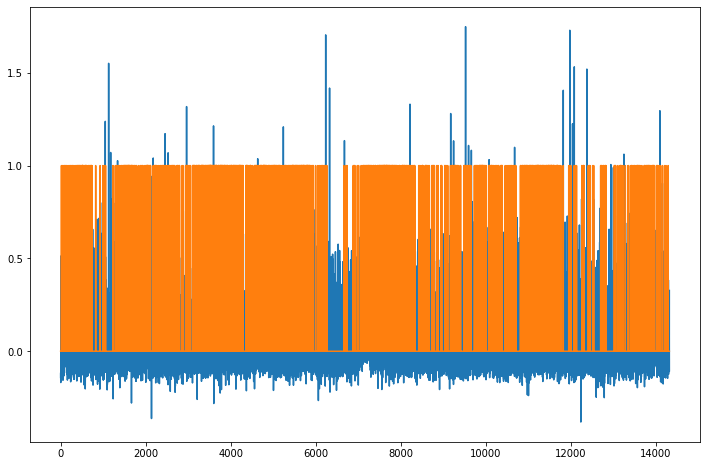

In [37]:
plt.figure(figsize=(12,8))
TTest = pocket.use(npXTrain)
YpTrain = np.float64(npYTrain)
plt.plot(npYTrain)

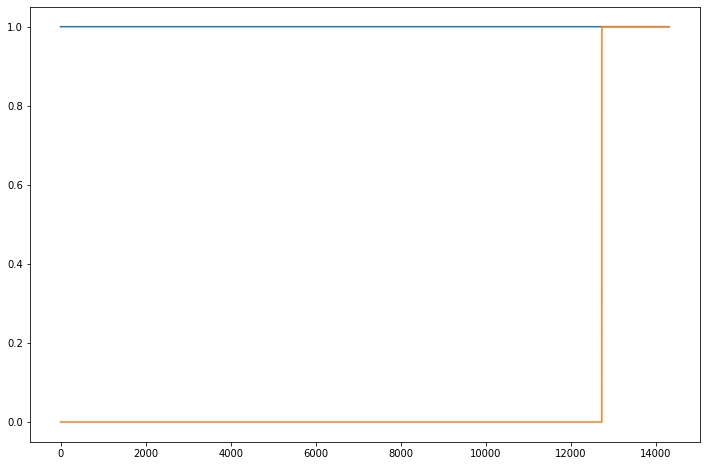

In [38]:
plt.figure(figsize=(12,8))
DiscTest = np.ones((TTest.shape[0],1))
for i in range(TTest.shape[0]):
    if TTest[i,0]<-1:
        DiscTest[i,0] = -1
plt.plot(np.sort(DiscTest,0))
plt.plot(np.sort(npYTrain,0))

In [39]:
TTest = TTest.reshape(TTest.shape[0],1)
TempTest = TTest.copy()
TempTest[TempTest>=-0.5] = 1
TempTest[TempTest<-0.5] = 0
print("Accuracy : ", np.sum(np.sign(TempTest)==np.sign(YpTrain))*800/TTest.shape[0], "%")

Accuracy :  88.61572845369464 %


[[ 3.69177738e-05]
 [-8.11664797e-03]
 [ 6.58585180e-03]
 [ 6.54074387e-04]
 [ 3.27677158e-04]
 [ 9.75817264e-03]
 [-1.13008725e-03]
 [ 1.74125096e-03]]


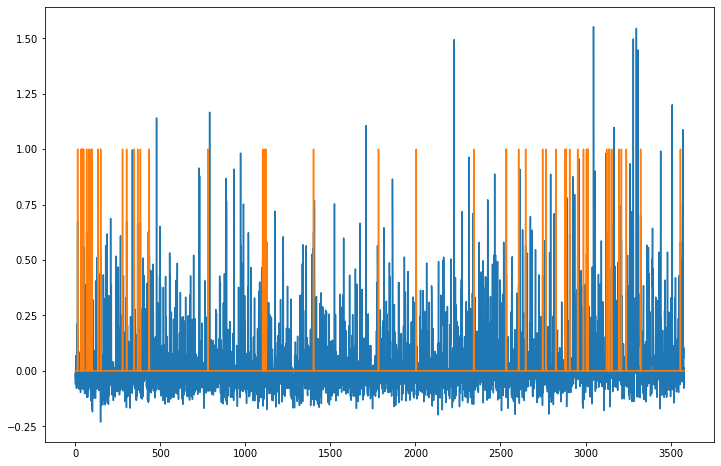

In [40]:
plt.figure(figsize=(12,8))
TestTest = pocket.use(npXTest)
npYTest = np.float64(npYTest)
plt.plot(npYTest)

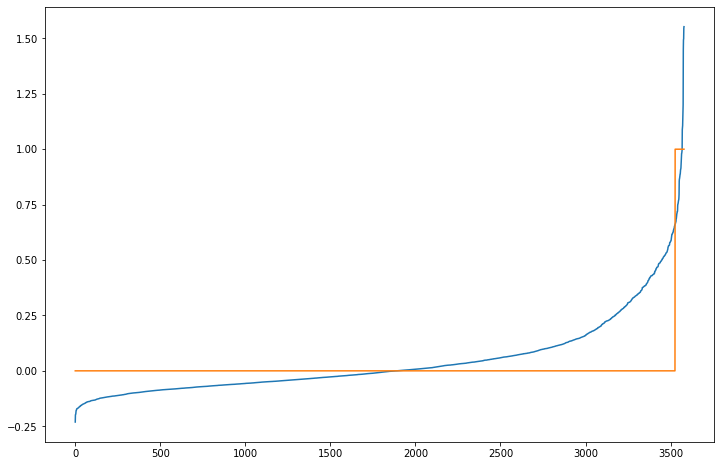

In [41]:
plt.figure(figsize=(12,8))
plt.plot(np.sort(TestTest,0))
plt.plot(np.sort(npYTest,0))

# Discussions about parameter/network structure choice 
Input layer contains 16 nodes(No. of features of input) and output layer contains 2 nodes(Binary classification). A hidden layer is included such that it contains 8 nodes. 8 nodes are considered since gradual decrease of nodes is a good idea. Reducing all the nodes at a time can result in inefficient results. After testing with various values of lambda, with all the values of lambda between 0 and 1, we are able to obtain similar results. Given are the parameters and their values used. <br>
verbose: False <br>
Lambda: 0.2 <br>
niter: 1000 <br>
wprecision: 1e-10 <br>
fprecision: 1e-10 <br>
wtracep: False <br>
ftracep: True <br>
optim: scg
The pocket algorithm is implemented to show the accuracy. 4 iterations are considered and the aplha value is set to 0.01. Till the iterations are completed the pocket algorithm is implemented. The accuracy obtained is 88%.

# Results
The accuracy of nonlinear logistic regression obtained is 88% for this model.<br>
The accuracy of nonlinear regression obtained is 85% for this model.<br>
Plots are drwan for the training and testing dataset. A plot is plotted for pocket algorithm to see the test and train data accuracy. A curve is drwan for the test data and train data.

We had to consider that we didn't allow any regularization for this example. This helped us, in that we could visualize a very high order polynomial in this experiment easier than expected. the goal of our experiment is achieved with relative ease.


# Conclusion
We got to learn the basics of how the neural net was actually trained and used in real world. It gives us an intuition of how we should use raw data and classify or perform regression, and achieve any polynomial curve by just using one hidden layer of neurons. This also gives us an over all view of how we can use the regularization and learning rate to get the desired fit to the data. 

Implementation 5- fold validation has been the most challenging task in this assignment. Getting higer accuracy is another task which helped me to learn better.